**IDS PROJECT**

**Name: Soham Sen |**
**Reg No: 2411021240008 |**
**Name of Dataset: Heart Failure Prediction Dataset |**
**GitHub Link: |**

In [2]:
#importing required modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
#reading the dataset
heart = pd.read_csv(r"C:\Users\imkab\Downloads\heart.csv")
heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
#information about each column (datatype, count of non-null values)
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
heart.describe()#gives a summary of numerical columns

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
#checking for null values
heart.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

**As there is no null values, we can skip cleaning the data**

**DATA PREPROCESSING**

In [7]:
#DATA TRANSFORMATION
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
heart_standardized = pd.DataFrame(scaler.fit_transform(heart[['Age', 'Cholesterol', 'RestingBP', 'MaxHR']]), columns=['Age', 'Cholesterol', 'RestingBP', 'MaxHR'])
heart_standardized
#Transformation is done to standardize the features to have a mean of 0 and a standard deviation of 1.

,Age,Cholesterol,RestingBP,MaxHR
0,-1.433140,0.825070,0.410909,1.382928
1,-0.478484,-0.171961,1.491752,0.754157
2,-1.751359,0.770188,-0.129513,-1.525138
3,-0.584556,0.139040,0.302825,-1.132156
4,0.051881,-0.034755,0.951331,-0.581981
...,...,...,...,...
913,-0.902775,0.596393,-1.210356,-0.188999
914,1.536902,-0.053049,0.627078,0.164684
915,0.370100,-0.620168,-0.129513,-0.857069
916,0.370100,0.340275,-0.129513,1.461525


In [8]:
#DATA NORMALIZATION
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
heart_normalized = pd.DataFrame(scaler.fit_transform(heart[['Age', 'Cholesterol', 'RestingBP', 'MaxHR']]), columns=['Age', 'Cholesterol', 'RestingBP', 'MaxHR'])
heart_normalized
#Normalization is done to scale the features to a range of [0, 1].

,Age,Cholesterol,RestingBP,MaxHR
0,0.244898,0.479270,0.70,0.788732
1,0.428571,0.298507,0.80,0.676056
2,0.183673,0.469320,0.65,0.267606
3,0.408163,0.354892,0.69,0.338028
4,0.530612,0.323383,0.75,0.436620
...,...,...,...,...
913,0.346939,0.437811,0.55,0.507042
914,0.816327,0.320066,0.72,0.570423
915,0.591837,0.217247,0.65,0.387324
916,0.591837,0.391376,0.65,0.802817


In [9]:
#ENCODING
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
#Encoding categorical variables into numerical values
heart['RestingECG_Encoded'] = encoder.fit_transform(heart['RestingECG'])
heart['Angina_Encoded'] = encoder.fit_transform(heart['ExerciseAngina'])
heart['ST_Slope_Encoded'] = encoder.fit_transform(heart['ST_Slope'])


In [11]:
heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,RestingECG_Encoded,Angina_Encoded,ST_Slope_Encoded
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,1,0,2
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,1,0,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,2,0,2
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,1,1,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1,1,0,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1,1,0,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1,1,1,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1,0,0,1


In [12]:
#ONE-HOT ENCODING
data = heart['ChestPainType']
heart_encoded = pd.get_dummies(data, columns = ['ChestPainType'])
heart_encoded.T

,0,1,2,3,4,5,6,7,8,9,...,908,909,910,911,912,913,914,915,916,917
ASY,False,False,False,True,False,False,False,False,True,False,...,True,True,False,True,True,False,True,True,False,False
ATA,True,False,True,False,False,False,True,True,False,True,...,False,False,True,False,False,False,False,False,True,False
NAP,False,True,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
TA,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


**EXPLORATORY DATA ANALYSIS**

In [13]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 918 non-null    int64  
 1   Sex                 918 non-null    object 
 2   ChestPainType       918 non-null    object 
 3   RestingBP           918 non-null    int64  
 4   Cholesterol         918 non-null    int64  
 5   FastingBS           918 non-null    int64  
 6   RestingECG          918 non-null    object 
 7   MaxHR               918 non-null    int64  
 8   ExerciseAngina      918 non-null    object 
 9   Oldpeak             918 non-null    float64
 10  ST_Slope            918 non-null    object 
 11  HeartDisease        918 non-null    int64  
 12  RestingECG_Encoded  918 non-null    int64  
 13  Angina_Encoded      918 non-null    int64  
 14  ST_Slope_Encoded    918 non-null    int64  
dtypes: float64(1), int64(9), object(5)
memory usage: 107.7+ K

In [14]:
#CORRELATION MATRIX
columns = ['Age', 'Cholesterol', 'RestingBP', 'MaxHR']
heart_corr = heart[columns].corr()
heart_corr

,Age,Cholesterol,RestingBP,MaxHR
Age,1.000000,-0.095282,0.254399,-0.382045
Cholesterol,-0.095282,1.000000,0.100893,0.235792
RestingBP,0.254399,0.100893,1.000000,-0.112135
MaxHR,-0.382045,0.235792,-0.112135,1.000000


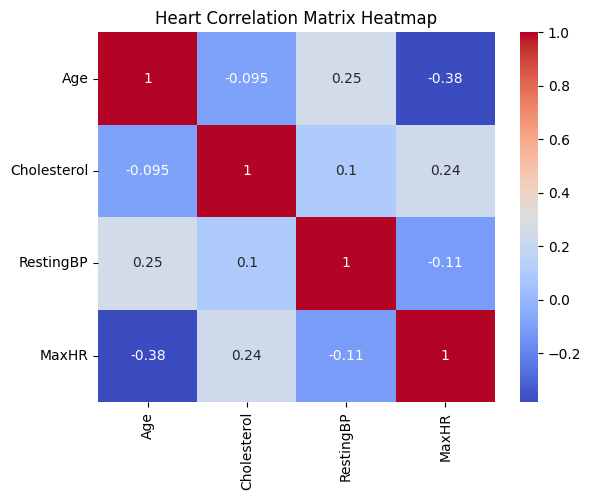

In [15]:
#CORRELATION MATRIX HEATMAP
sns.heatmap(heart_corr, annot=True, cmap='coolwarm')
plt.title('Heart Correlation Matrix Heatmap')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

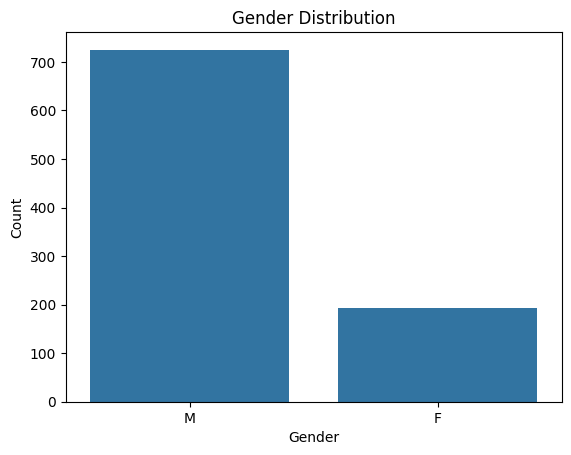

In [16]:
#Creating a Bar Plot for Gender Distribution
gender_count = heart['Sex'].value_counts()
sns.barplot(x = gender_count.index, y = gender_count.values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

C:\Users\imkab\AppData\Local\Temp\ipykernel_12328\3384920412.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = chestpain_count.index, y = chestpain_count.values, palette ='viridis')


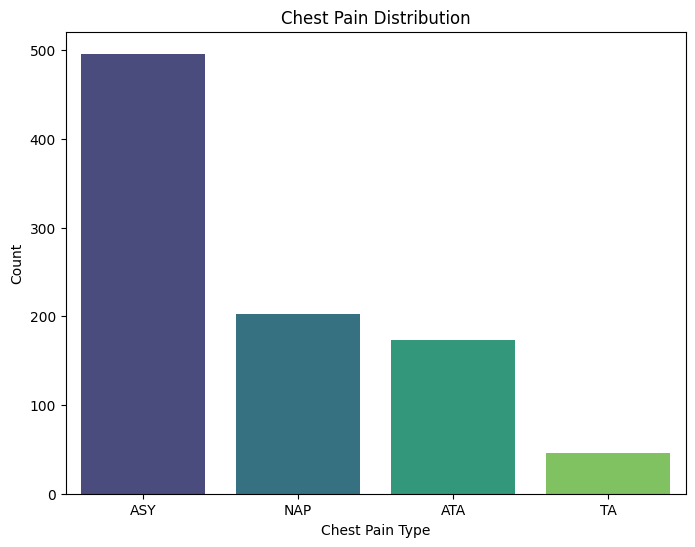

In [17]:
#Creating a Bar Plot for Chest Pain Distribution
chestpain_count = heart['ChestPainType'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x = chestpain_count.index, y = chestpain_count.values, palette ='viridis')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.title('Chest Pain Distribution')
plt.show()

C:\Users\imkab\AppData\Local\Temp\ipykernel_12328\656432683.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = ecg_count.index, y = ecg_count.values, palette = 'CMRmap')


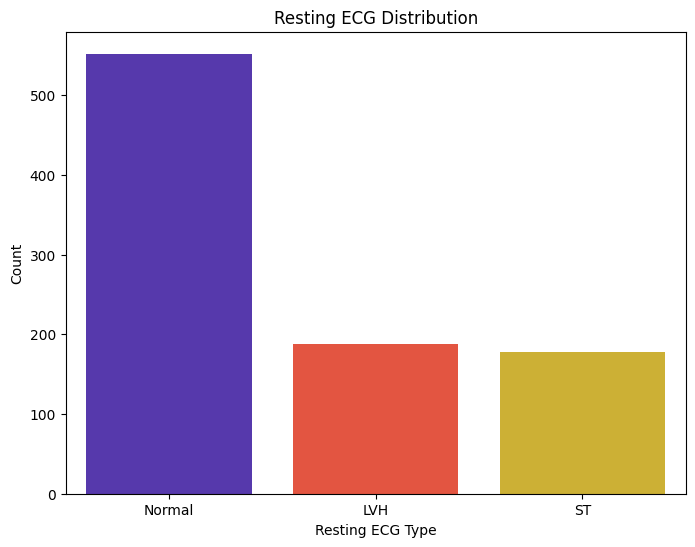

In [ ]:
#Creating a Bar Plot for the different types of ECGs
ecg_count = heart['RestingECG'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x = ecg_count.index, y = ecg_count.values, palette = 'CMRmap')
plt.xlabel('Resting ECG Type')
plt.ylabel('Count')
plt.title('Resting ECG Distribution')
plt.show()

C:\Users\imkab\AppData\Local\Temp\ipykernel_12328\535949307.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = slope_count.index, y = slope_count.values, palette = 'RdYlBu')


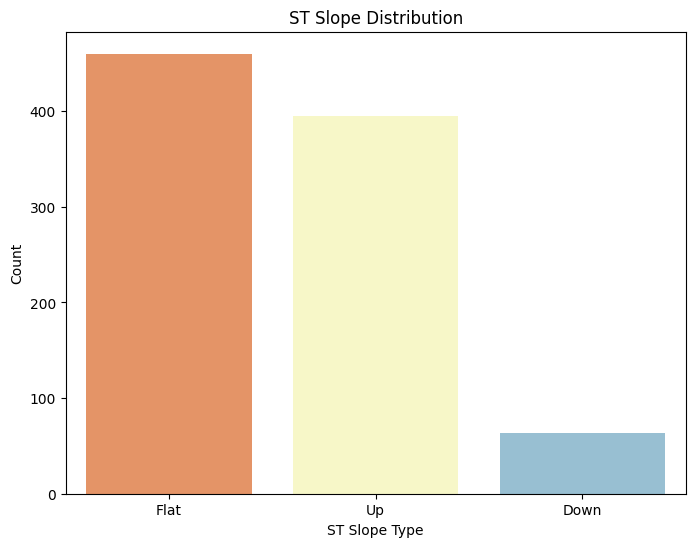

In [ ]:
#Creating a Bar Plot for the differnt types of ST Slope (Seen in an ECG graph)
slope_count = heart['ST_Slope'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x = slope_count.index, y = slope_count.values, palette = 'RdYlBu')
plt.xlabel('ST Slope Type')
plt.ylabel('Count')
plt.title('ST Slope Distribution')
plt.show()

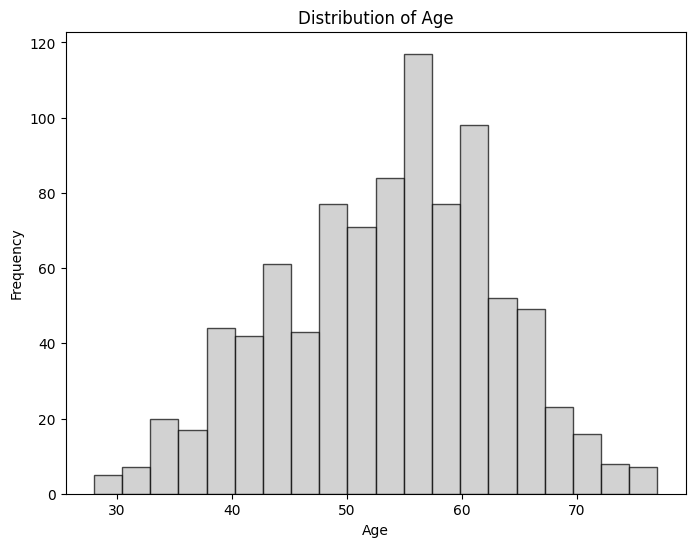

In [ ]:
#Distribution of Age in the dataset
plt.figure(figsize=(8, 6))
heart['Age'].hist(bins=20, color='silver', alpha=0.7, edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

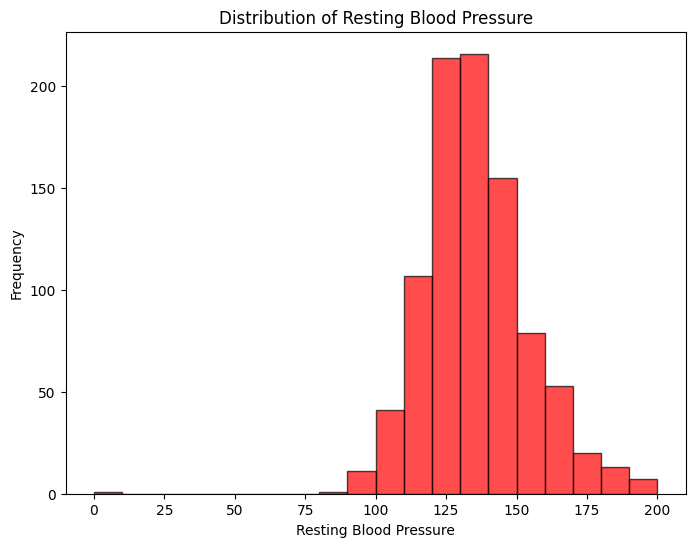

In [ ]:
#Distribution of Resting Blood Pressure in the dataset
plt.figure(figsize=(8, 6))
heart['RestingBP'].hist(bins=20, color='red', alpha=0.7, edgecolor='black')
plt.title('Distribution of Resting Blood Pressure')
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

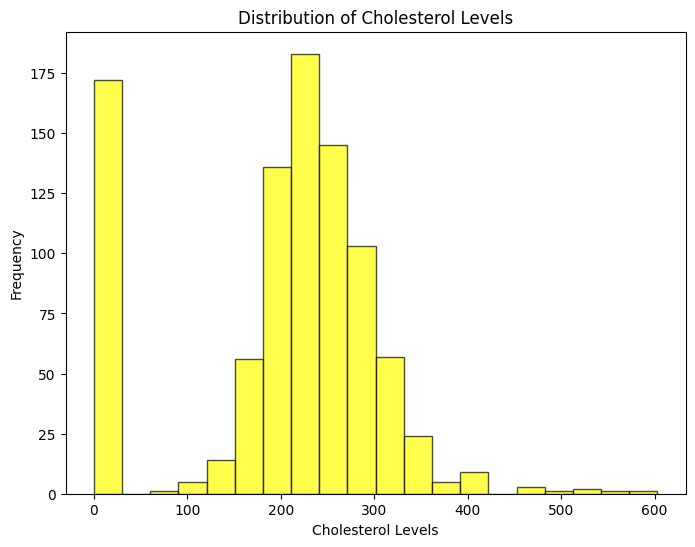

In [ ]:
#Distribution of Cholesterol Levels in the dataset
plt.figure(figsize=(8, 6))
heart['Cholesterol'].hist(bins=20, color='yellow', alpha=0.7, edgecolor='black')
plt.title('Distribution of Cholesterol Levels')
plt.xlabel('Cholesterol Levels')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

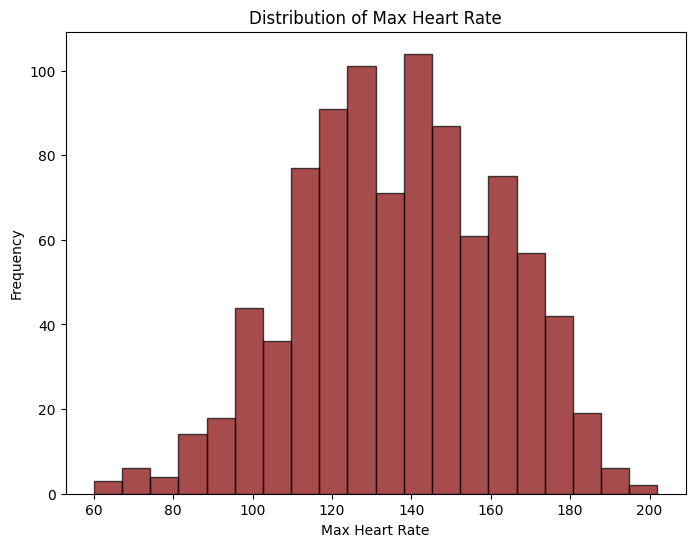

In [ ]:
#Distribution of Maximum Heart Rate in the dataset
plt.figure(figsize=(8, 6))
heart['MaxHR'].hist(bins=20, color='maroon', alpha=0.7, edgecolor='black')
plt.title('Distribution of Max Heart Rate')
plt.xlabel('Max Heart Rate')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

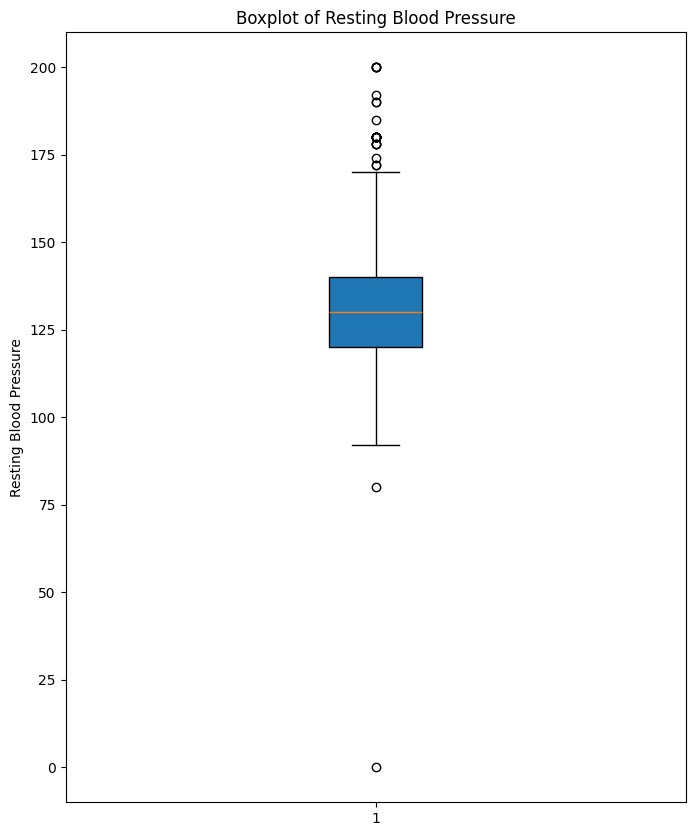

In [ ]:
#Creating a Boxplot of the Restign Blood Pressure in the dataset
data = heart['RestingBP']
plt.figure(figsize=(8,10))
plt.boxplot(data, patch_artist = True, label = "Resting Blood Pressure")
plt.title("Boxplot of Resting Blood Pressure")
plt.ylabel("Resting Blood Pressure")
plt.grid(False)
plt.show()

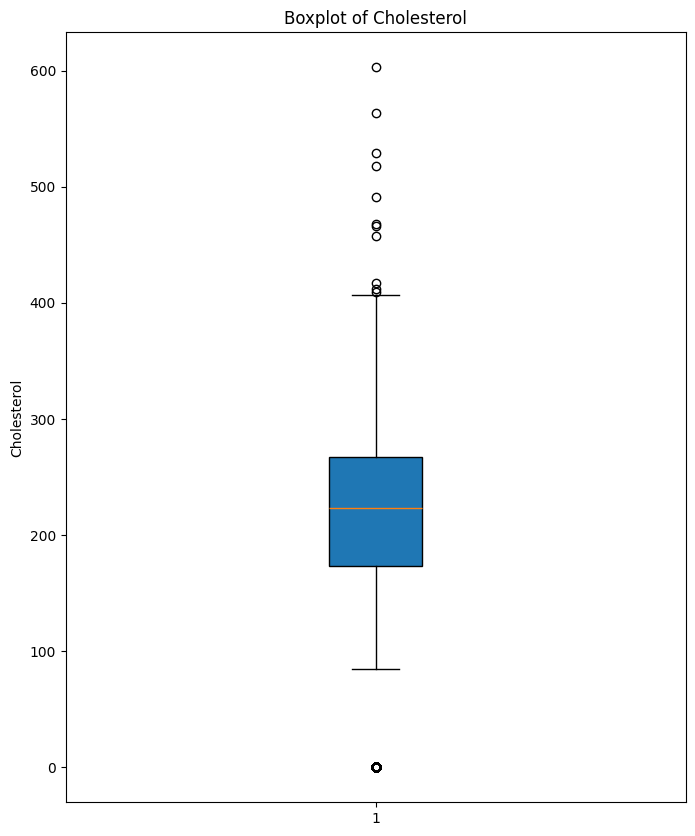

In [ ]:
#Creatgin a Boxplot of the Cholesterol Levels in the dataset
data = heart['Cholesterol']
plt.figure(figsize=(8,10))
plt.boxplot(data, patch_artist = True, label = "Cholesterol")
plt.title("Boxplot of Cholesterol")
plt.ylabel("Cholesterol")
plt.grid(False)
plt.show()

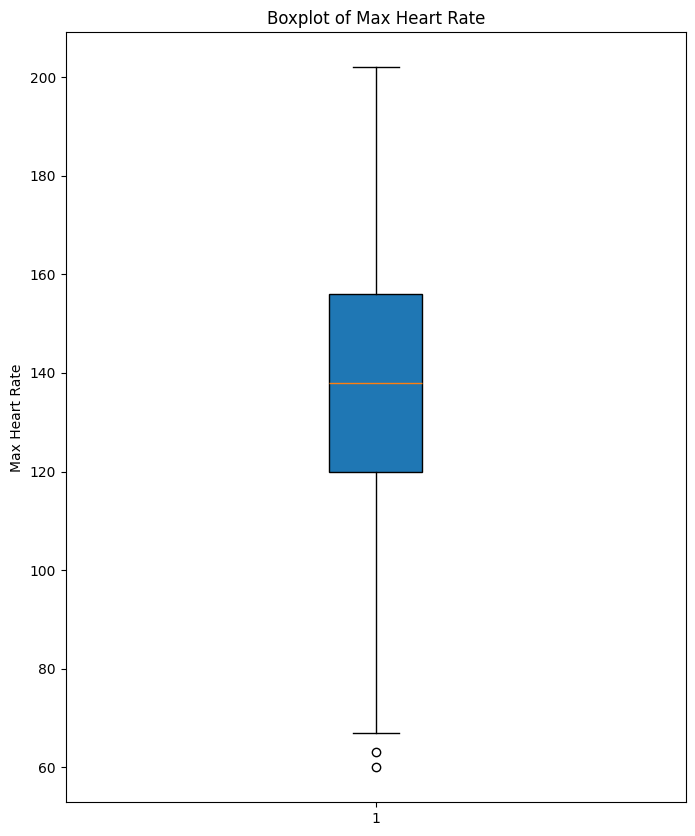

In [26]:
data = heart['MaxHR']
plt.figure(figsize=(8,10))
plt.boxplot(data, patch_artist = True, label = "Max Heart Rate")
plt.title("Boxplot of Max Heart Rate")
plt.ylabel("Max Heart Rate")
plt.grid(False)
plt.show()

The small circles in the above boxplots indicate the presence of outliers in the columns in the dataset

**FEATURE ENGINEERING**

Feature Engineering involves performing similar operations as Data Cleaning (i.e, Handling Missing Values), Data Transformation (Normalization & Standardization), Encoding Data (Label & One-Hot Encoding). These operations have already been conducted previously, so we can skip performing these operations.

In [27]:
#CREATING FEATURES FROM EXISTING FEATURES
heart['Chol_BP_Ratio'] = heart['Cholesterol'] / (heart['RestingBP'] + 1) #adding 1 to avoid division by zero
heart["High_Cholesterol"] = (heart["Cholesterol"] > 240).astype(int) #binary indicator for high cholesterol

In [28]:
heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,RestingECG_Encoded,Angina_Encoded,ST_Slope_Encoded,Chol_BP_Ratio,High_Cholesterol
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,1,0,2,2.049645,1
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,1,0,1,1.118012,0
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,2,0,2,2.160305,1
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,1,1,1,1.539568,0
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,1,0,2,1.291391,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1,1,0,1,2.378378,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1,1,0,1,1.331034,0
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1,1,1,1,1.000000,0
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1,0,0,1,1.801527,0


In [29]:
#BINNING (COMBINING CONTINUOUS DATA)
data = heart['Age']
heart["Age Group"] = pd.cut(data, bins=[0, 30, 40, 50, 60, 70, 80], labels=["Young Adult/Teen", "30s", "40s", "50s", "60s", "70+"])


In [30]:
heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,RestingECG_Encoded,Angina_Encoded,ST_Slope_Encoded,Chol_BP_Ratio,High_Cholesterol,Age Group
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,1,0,2,2.049645,1,30s
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,1,0,1,1.118012,0,40s
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,2,0,2,2.160305,1,30s
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,1,1,1,1.539568,0,40s
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,1,0,2,1.291391,0,50s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1,1,0,1,2.378378,1,40s
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1,1,0,1,1.331034,0,60s
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1,1,1,1,1.000000,0,50s
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1,0,0,1,1.801527,0,50s


**MODEL TRAINING AND EVALUATION**

In [31]:
heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,RestingECG_Encoded,Angina_Encoded,ST_Slope_Encoded,Chol_BP_Ratio,High_Cholesterol,Age Group
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,1,0,2,2.049645,1,30s
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,1,0,1,1.118012,0,40s
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,2,0,2,2.160305,1,30s
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,1,1,1,1.539568,0,40s
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,1,0,2,1.291391,0,50s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1,1,0,1,2.378378,1,40s
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1,1,0,1,1.331034,0,60s
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1,1,1,1,1.000000,0,50s
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1,0,0,1,1.801527,0,50s


In [32]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 918 non-null    int64   
 1   Sex                 918 non-null    object  
 2   ChestPainType       918 non-null    object  
 3   RestingBP           918 non-null    int64   
 4   Cholesterol         918 non-null    int64   
 5   FastingBS           918 non-null    int64   
 6   RestingECG          918 non-null    object  
 7   MaxHR               918 non-null    int64   
 8   ExerciseAngina      918 non-null    object  
 9   Oldpeak             918 non-null    float64 
 10  ST_Slope            918 non-null    object  
 11  HeartDisease        918 non-null    int64   
 12  RestingECG_Encoded  918 non-null    int64   
 13  Angina_Encoded      918 non-null    int64   
 14  ST_Slope_Encoded    918 non-null    int64   
 15  Chol_BP_Ratio       918 non-null    floa

In [33]:
columns = ['RestingBP', 'Cholesterol']
heart_corr = heart[columns].corr()
heart_corr

,RestingBP,Cholesterol
RestingBP,1.000000,0.100893
Cholesterol,0.100893,1.000000


In [ ]:
X = heart.iloc[:, [3, 4]].values #Features
y = heart.iloc[:, 11].values #Target Variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
X

array([[140, 289],
       [160, 180],
       [130, 283],
       ...,
       [130, 131],
       [130, 236],
       [138, 175]], shape=(918, 2))

In [36]:
y

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
sc = StandardScaler()
X = sc.fit_transform(X)
X #Standardizing the features to have a mean of 0 and a standard deviation of 1.

array([[ 0.41090889,  0.82507026],
       [ 1.49175234, -0.17196105],
       [-0.12951283,  0.7701878 ],
       ...,
       [-0.12951283, -0.62016778],
       [-0.12951283,  0.34027522],
       [ 0.30282455, -0.21769643]], shape=(918, 2))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Splitting the dataset into training and testing sets with 80% for training and 20% for testing.

In [39]:
X_train

array([[-0.66993455,  0.37686353],
       [-0.12951283,  0.09330416],
       [ 0.95133062,  0.12989247],
       ...,
       [-0.12951283,  0.49577552],
       [ 1.05941496, -1.81843477],
       [ 0.95133062,  1.76721911]], shape=(734, 2))

In [40]:
y_train

array([0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)
#Creating the model and fitting it to the training data

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)
y_pred
#Predicting the target variable for the test set using the trained model

array([1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1])

**Evaluating the Model**

In [43]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[35, 42],
       [44, 63]])

In [44]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.532608695652174

In [ ]:
cr = classification_report(y_test, y_pred)
print(cr)
#An overall summary of the model's performance, including precision, recall, and F1-score for each class.

              precision    recall  f1-score   support

           0       0.44      0.45      0.45        77
           1       0.60      0.59      0.59       107

    accuracy                           0.53       184
   macro avg       0.52      0.52      0.52       184
weighted avg       0.53      0.53      0.53       184

